### Developing "Momentum" Trading Strategy



In [13]:
import numpy as np 
import pandas as pd 
import pandas_datareader as pdr 
import matplotlib.pyplot as plt

### 1. Download data

In [14]:
import yfinance as yf 
yf.pdr_override()

In [15]:
gld = pdr.data.get_data_yahoo('GLD')

[*********************100%***********************]  1 of 1 completed


In [17]:
day = np.arange(1, len(gld) + 1)
gld['day'] = day 
#gld 
gld.drop(columns=['Adj Close', 'Volume'], inplace=True)
gld = gld[['day', 'Open', 'High', 'Low', 'Close']]

In [19]:
gld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4570 entries, 2004-11-18 to 2023-01-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     4570 non-null   int32  
 1   Open    4570 non-null   float64
 2   High    4570 non-null   float64
 3   Low     4570 non-null   float64
 4   Close   4570 non-null   float64
dtypes: float64(4), int32(1)
memory usage: 196.4 KB


### 2. Add data/transform data 

* Calculate signal based on some price or statistical action
* We are going to try a moving average crossover to generate signals 
* We are always invested either long or short

#### Add moving averages to the dataframe

In [50]:
gld['9-day'] = gld['Close'].rolling(9).mean()
gld['21-day'] = gld['Close'].rolling(21).mean()


C:\Users\Bruger\AppData\Local\Temp\ipykernel_30608\1622788657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['9-day'] = gld['Close'].rolling(9).mean()
C:\Users\Bruger\AppData\Local\Temp\ipykernel_30608\1622788657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['21-day'] = gld['Close'].rolling(21).mean()


In [51]:
gld[19:25]

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry,Return
Date,,,,,,,,,,,,
2005-01-18,41,42.220001,42.380001,42.150002,42.320000,42.295555,NaN,-1,0.000000,-0.000000,0.0,0.000000
2005-01-19,42,42.650002,42.650002,42.200001,42.259998,42.250000,43.127143,-1,-0.001419,0.001419,0.0,-0.001419
2005-01-20,43,42.119999,42.320000,42.110001,42.250000,42.261111,43.027619,-1,-0.000237,0.000237,0.0,-0.000237
2005-01-21,44,42.320000,42.820000,42.290001,42.740002,42.361111,42.957143,-1,0.011531,-0.011531,0.0,0.011531
2005-01-24,45,42.740002,42.820000,42.669998,42.770000,42.452222,42.897619,-1,0.000702,-0.000702,0.0,0.000702
2005-01-25,46,42.529999,42.560001,42.099998,42.240002,42.455555,42.800952,-1,-0.012469,0.012469,0.0,-0.012469


#### Add a "signal" column

In [52]:
gld['signal'] = np.where(gld['9-day'] > gld['21-day'], 1, 0)
gld['signal'] = np.where(gld['9-day'] < gld['21-day'], -1, gld['signal'])
gld.dropna(inplace=True)


C:\Users\Bruger\AppData\Local\Temp\ipykernel_30608\428009204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['signal'] = np.where(gld['9-day'] > gld['21-day'], 1, 0)
C:\Users\Bruger\AppData\Local\Temp\ipykernel_30608\428009204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['signal'] = np.where(gld['9-day'] < gld['21-day'], -1, gld['signal'])
C:\Users\Bruger\AppData\Local\Temp\ipykernel_30608\428009204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [53]:
gld

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry,Return
Date,,,,,,,,,,,,
2005-01-19,42,42.650002,42.650002,42.200001,42.259998,42.250000,43.127143,-1,-0.001419,0.001419,0.0,-0.001419
2005-01-20,43,42.119999,42.320000,42.110001,42.250000,42.261111,43.027619,-1,-0.000237,0.000237,0.0,-0.000237
2005-01-21,44,42.320000,42.820000,42.290001,42.740002,42.361111,42.957143,-1,0.011531,-0.011531,0.0,0.011531
2005-01-24,45,42.740002,42.820000,42.669998,42.770000,42.452222,42.897619,-1,0.000702,-0.000702,0.0,0.000702
2005-01-25,46,42.529999,42.560001,42.099998,42.240002,42.455555,42.800952,-1,-0.012469,0.012469,0.0,-0.012469
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-09,4566,174.509995,175.039993,173.880005,174.100006,170.792224,168.729048,1,0.002243,0.002243,0.0,0.002243
2023-01-10,4567,174.610001,174.979996,174.059998,174.740005,171.466670,169.122858,1,0.003669,0.003669,0.0,0.003669
2023-01-11,4568,174.759995,174.789993,173.720001,174.619995,172.212224,169.482858,1,-0.000687,-0.000687,0.0,-0.000687


In [54]:
gld['Return'] = np.log(gld['Close']).diff()
gld['system_return'] = gld['signal'] * gld['Return']
gld['entry'] = gld.signal.diff()


C:\Users\Bruger\AppData\Local\Temp\ipykernel_30608\2278904795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['Return'] = np.log(gld['Close']).diff()
C:\Users\Bruger\AppData\Local\Temp\ipykernel_30608\2278904795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['system_return'] = gld['signal'] * gld['Return']
C:\Users\Bruger\AppData\Local\Temp\ipykernel_30608\2278904795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

#### Plot trades on time series

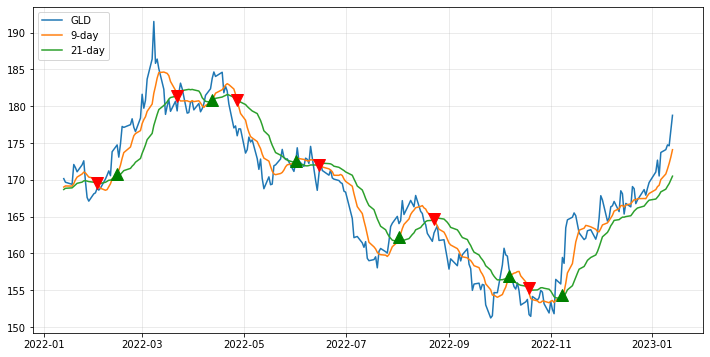

In [55]:
plt.rcParams['figure.figsize'] = 12,6
plt.grid(True, alpha=.3)
plt.plot(gld.iloc[-252:]['Close'], label = 'GLD')
plt.plot(gld.iloc[-252:]['9-day'], label = '9-day')
plt.plot(gld.iloc[-252:]['21-day'], label = '21-day')
plt.plot(gld.iloc[-252:].loc[gld.entry == 2].index, gld[-252:]['9-day'][gld.entry == 2], '^',
        color = 'g', markersize = 12)

plt.plot(gld.iloc[-252:].loc[gld.entry == -2].index, gld[-252:]['21-day'][gld.entry == -2], 'v',
        color = 'r', markersize = 12)
plt.legend(loc=2);

C:\Users\Bruger\AppData\Local\Temp\ipykernel_30608\708173815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['system_return'] = gld.signal * gld.Return


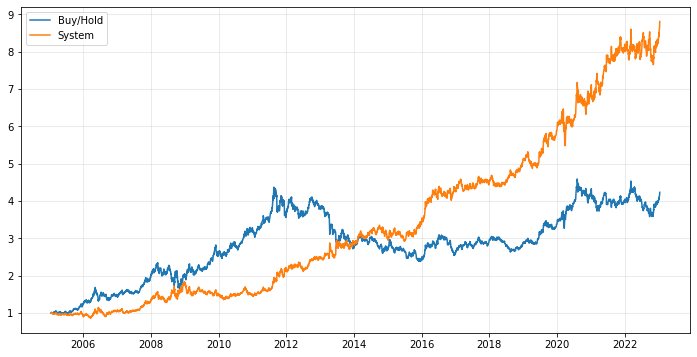

In [56]:
gld['system_return'] = gld.signal * gld.Return 
plt.plot(np.exp(gld.Return).cumprod(), label = 'Buy/Hold')
plt.plot(np.exp(gld.system_return).cumprod(), label = 'System')
plt.legend(loc=2)
plt.grid(True,alpha=.3)

In [57]:
np.exp(gld['return']).cumprod()[-1] -1

3.224007462096006

In [58]:
np.exp(gld['system_return']).cumprod()[-1] -1

7.807087568521014